In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import plotly.express as px
import xarray as xr

In [3]:
sub = xr.open_dataset('../data/netcdfs/banner_lowman_05208_21019-019_21021-007_0006d.nc')

In [73]:
dem = sub['dem'].values

In [74]:
dem = np.where(dem >800,dem,np.nan)

In [27]:
np.nanmean(dem)

1788.6937

In [66]:
np.nanmax(dem)

2576.4639

In [69]:
np.nanmin(dem[1800:2000,0:400])

1161.8583

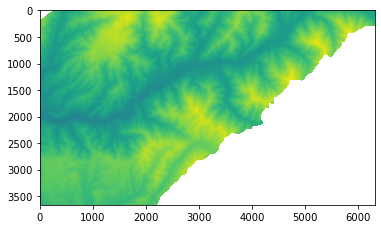

In [67]:
plt.imshow(dem)

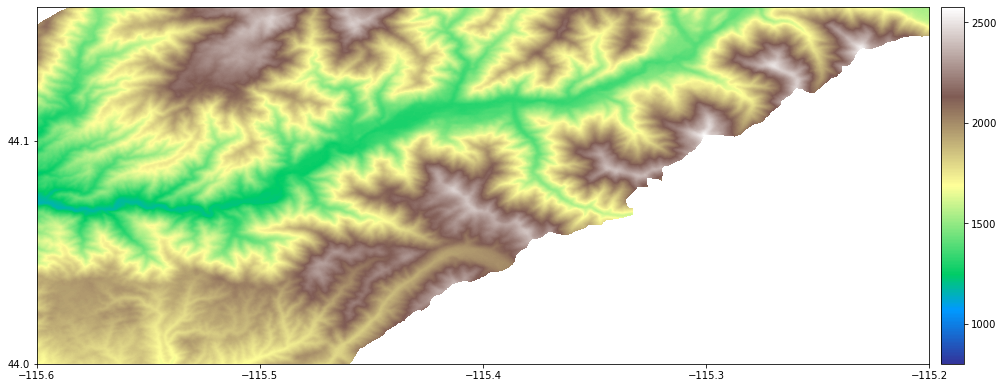

In [75]:
import matplotlib.colors as colors
real_x = [-115.6, -115.2]
real_y = [44,44.16]
extent = [real_x[0], real_x[-1], real_y[0], real_y[-1]]
fig, ax = plt.subplots(figsize = (16,12))
colors_undersea = plt.cm.terrain(np.linspace(0, 0.17, 256))
colors_land = plt.cm.terrain(np.linspace(0.25, 1, 256))
all_colors = np.vstack((colors_undersea, colors_land))
terrain_map = colors.LinearSegmentedColormap.from_list('terrain_map',
    all_colors)

# make the norm:  Note the center is offset so that the land has more
# dynamic range:
divnorm = colors.TwoSlopeNorm(vmin=1000, vcenter=1981, vmax=2800)

im = ax.imshow(dem, extent = extent, cmap = plt.cm.terrain)
plt.locator_params(nbins=2)
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(im, cax=cax) # Similar to fig.colorbar(im, cax = cax)
plt.locator_params(nbins=4)
plt.savefig('../figures/subset_dem.png')

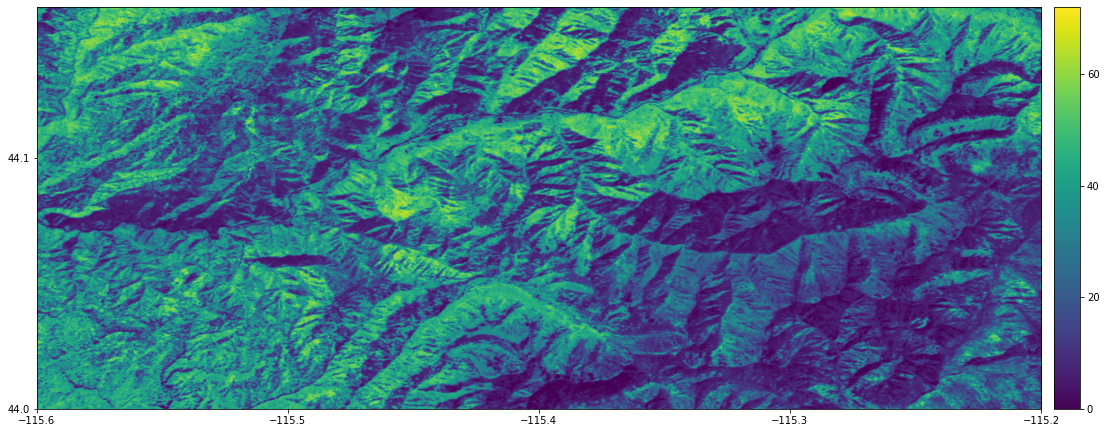

In [7]:
import matplotlib.colors as colors
real_x = [-115.6, -115.2]
real_y = [44,44.16]
extent = [real_x[0], real_x[-1], real_y[0], real_y[-1]]
fig, ax = plt.subplots(figsize = (18,12))

# make the norm:  Note the center is offset so that the land has more
# dynamic range:
im = ax.imshow(sub['trees'], extent = extent)
plt.locator_params(nbins=2)
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(im, cax=cax) # Similar to fig.colorbar(im, cax = cax)
plt.locator_params(nbins=4)
#plt.savefig('../figures/subset_dem.png')

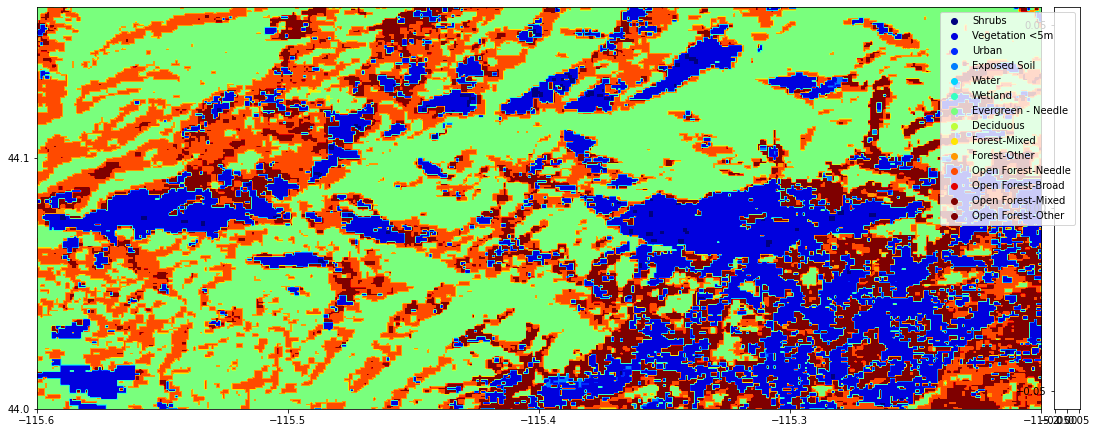

In [43]:
cover_descriptions = {20.:'Shrubs',30.:'Vegetation <5m', 50.:'Urban', 60.:'Exposed Soil', 80.: 'Water',
                     90.: 'Wetland', 111.:'Evergreen - Needle', 114.:'Deciduous',
                     115.:'Forest-Mixed',116.:'Forest-Other',121.:'Open Forest-Needle',
                     124.:'Open Forest-Broad',125.:'Open Forest-Mixed',126.:'Open Forest-Other'}

import matplotlib
import matplotlib.colors as colors

cmap = plt.cm.jet  # define the colormap
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]

# create the new map
cmap = colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)

real_x = [-115.6, -115.2]
real_y = [44,44.16]
extent = [real_x[0], real_x[-1], real_y[0], real_y[-1]]
fig, ax = plt.subplots(figsize = (18,12))
# make the norm:  Note the center is offset so that the land has more
# dynamic range:
bounds= np.unique(sub['land_class'])
norm = colors.BoundaryNorm(bounds, cmap.N)

im = ax.imshow(sub['land_class'], extent = extent, cmap = cmap, norm = norm)
plt.locator_params(nbins=2)

colours = im.cmap(im.norm(bounds))

D_id_color = dict(zip(bounds, colours))


cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
#plt.colorbar(im, cax=cax) # Similar to fig.colorbar(im, cax = cax)
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in D_id_color.values()]
cax.legend(markers, [cover_descriptions[key] for key in D_id_color.keys()], numpoints=1)
plt.locator_params(nbins=4)
#plt.savefig('../figures/subset_dem.png')

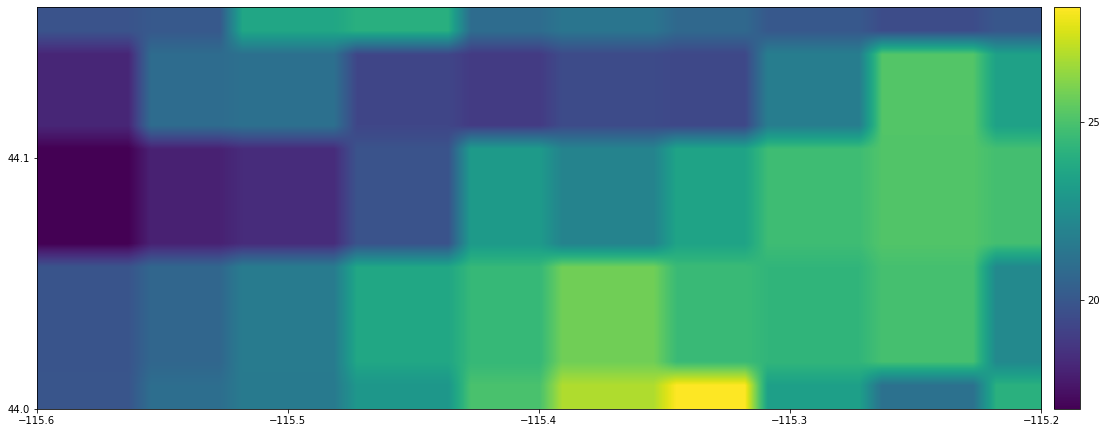

In [45]:
import matplotlib.colors as colors
real_x = [-115.6, -115.2]
real_y = [44,44.16]
extent = [real_x[0], real_x[-1], real_y[0], real_y[-1]]
fig, ax = plt.subplots(figsize = (18,12))

# make the norm:  Note the center is offset so that the land has more
# dynamic range:
im = ax.imshow(sub['ppt_total'], extent = extent)
plt.locator_params(nbins=2)
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(im, cax=cax) # Similar to fig.colorbar(im, cax = cax)
plt.locator_params(nbins=4)
#plt.savefig('../figures/subset_dem.png')

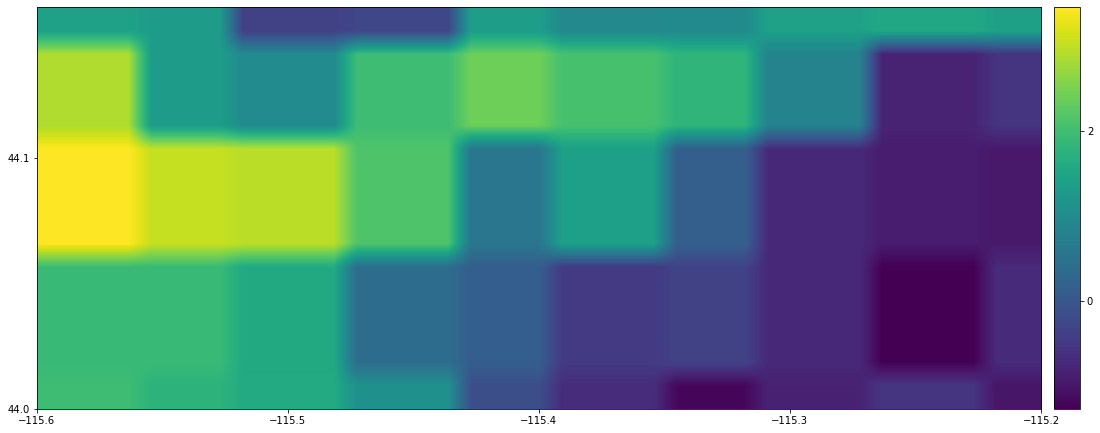

In [46]:
import matplotlib.colors as colors
real_x = [-115.6, -115.2]
real_y = [44,44.16]
extent = [real_x[0], real_x[-1], real_y[0], real_y[-1]]
fig, ax = plt.subplots(figsize = (18,12))

# make the norm:  Note the center is offset so that the land has more
# dynamic range:
im = ax.imshow(sub['tmean'], extent = extent)
plt.locator_params(nbins=2)
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(im, cax=cax) # Similar to fig.colorbar(im, cax = cax)
plt.locator_params(nbins=4)
#plt.savefig('../figures/subset_dem.png')

In [50]:
asp = -1*np.degrees(sub['aspect'].values)+180

(array([1839623., 2165371., 2714767., 2587940., 2227164., 1914568.,
        2204599., 2793102., 2567284., 2071848.]),
 array([1.61368483e-02, 3.60109767e+01, 7.20058166e+01, 1.08000656e+02,
        1.43995496e+02, 1.79990336e+02, 2.15985176e+02, 2.51980016e+02,
        2.87974856e+02, 3.23969696e+02, 3.59964535e+02]),
 <BarContainer object of 10 artists>)

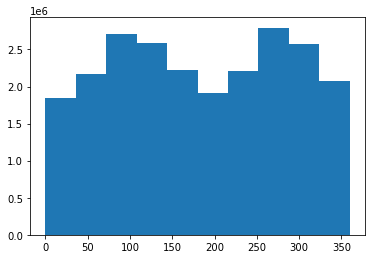

In [39]:
plt.hist(asp[~np.isnan(asp)])

In [48]:
def circular_hist(ax, x, bins=16, density=True, offset=0, gaps=True):
    """
    Produce a circular histogram of angles on ax.

    Parameters
    ----------
    ax : matplotlib.axes._subplots.PolarAxesSubplot
        axis instance created with subplot_kw=dict(projection='polar').

    x : array
        Angles to plot, expected in units of radians.

    bins : int, optional
        Defines the number of equal-width bins in the range. The default is 16.

    density : bool, optional
        If True plot frequency proportional to area. If False plot frequency
        proportional to radius. The default is True.

    offset : float, optional
        Sets the offset for the location of the 0 direction in units of
        radians. The default is 0.

    gaps : bool, optional
        Whether to allow gaps between bins. When gaps = False the bins are
        forced to partition the entire [-pi, pi] range. The default is True.

    Returns
    -------
    n : array or list of arrays
        The number of values in each bin.

    bins : array
        The edges of the bins.

    patches : `.BarContainer` or list of a single `.Polygon`
        Container of individual artists used to create the histogram
        or list of such containers if there are multiple input datasets.
    """
    # Wrap angles to [-pi, pi)
    x = (x+np.pi) % (2*np.pi) - np.pi

    # Force bins to partition entire circle
    if not gaps:
        bins = np.linspace(-np.pi, np.pi, num=bins+1)

    # Bin data and record counts
    n, bins = np.histogram(x, bins=bins)

    # Compute width of each bin
    widths = np.diff(bins)

    # By default plot frequency proportional to area
    if density:
        # Area to assign each bin
        area = n / x.size
        # Calculate corresponding bin radius
        radius = (area/np.pi) ** .5
    # Otherwise plot frequency proportional to radius
    else:
        radius = n

    # Plot data on ax
    patches = ax.bar(bins[:-1], radius, zorder=1, align='edge', width=widths,
                     edgecolor='C0', fill=True, linewidth=2, facecolor = 'lightblue', alpha = 0.8)

    # Set the direction of the zero angle
    ax.set_theta_offset(offset)

    # Remove ylabels 
    if density:
        ax.set_yticks([])

    return n, bins, patches

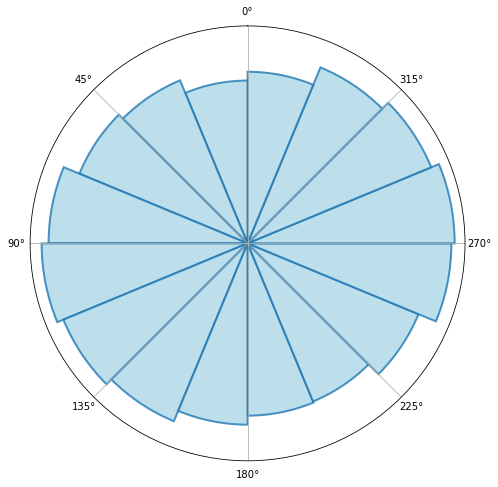

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Construct figure and axis to plot on
fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection='polar'), figsize = (12,8))

# Visualise by area of bins
circular_hist(ax, np.radians(asp), offset = math.pi/2)
# Visualise by radius of bins
plt.savefig('../figures/aspects.png')